#Exercise 1

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree with maximum depth of 3
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
# Evaluate the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


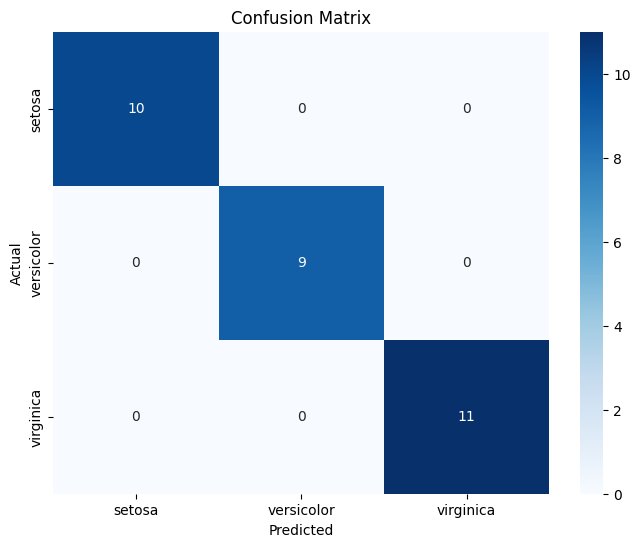

In [5]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
# Bonus: How to avoid overfitting
print("\nBonus: To avoid overfitting in this model, we could:")
print("- Use pruning techniques (like min_samples_split or min_samples_leaf)")
print("- Use cross-validation to find the optimal max_depth parameter")
print("- Collect more training data if possible")
print("- Use ensemble methods like Random Forest which are less prone to overfitting")


Bonus: To avoid overfitting in this model, we could:
- Use pruning techniques (like min_samples_split or min_samples_leaf)
- Use cross-validation to find the optimal max_depth parameter
- Collect more training data if possible
- Use ensemble methods like Random Forest which are less prone to overfitting


#Exercise 2

In [7]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] and reshape for CNN input
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8913 - loss: 0.3802 - val_accuracy: 0.9772 - val_loss: 0.0692
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9777 - loss: 0.0735 - val_accuracy: 0.9846 - val_loss: 0.0473
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9852 - loss: 0.0449 - val_accuracy: 0.9846 - val_loss: 0.0428
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9870 - val_loss: 0.0363
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9887 - val_loss: 0.0355
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9878 - val_loss: 0.0355
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9881 - val_loss: 0.0372
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9948 - loss: 0.0147 - 

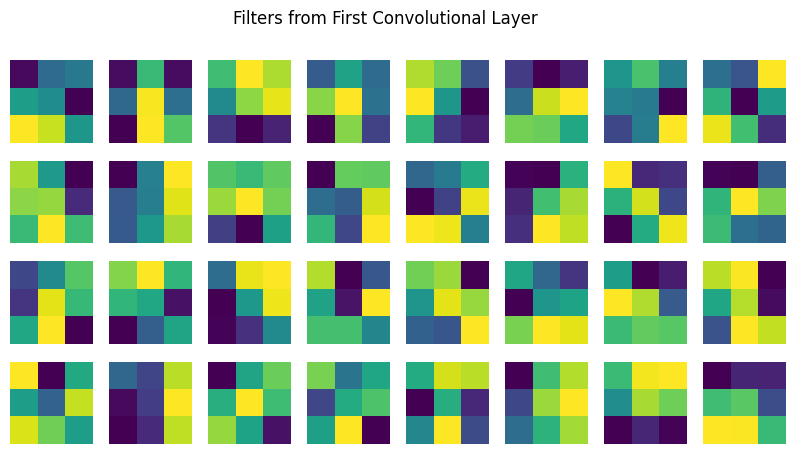

In [11]:
# Bonus: Visualize filters from the first convolutional layer
first_layer_weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(first_layer_weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filters from First Convolutional Layer')
plt.show()

#Exercise 3

In [12]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import numpy as np

In [13]:
# Load and preprocess IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# Build the RNN model with LSTM
model = models.Sequential([
    layers.Embedding(max_features, 128),
    layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 305ms/step - accuracy: 0.6978 - loss: 0.5599 - val_accuracy: 0.8316 - val_loss: 0.3923
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 317ms/step - accuracy: 0.8514 - loss: 0.3509 - val_accuracy: 0.8536 - val_loss: 0.3565
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 317ms/step - accuracy: 0.8898 - loss: 0.2753 - val_accuracy: 0.8444 - val_loss: 0.3602
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 320ms/step - accuracy: 0.9072 - loss: 0.2394 - val_accuracy: 0.8606 - val_loss: 0.3525
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 314ms/step - accuracy: 0.9024 - loss: 0.2408 - val_accuracy: 0.8564 - val_loss: 0.3729
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.8538 - loss: 0.3957

Test accuracy: 0.8548


In [15]:
# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 60ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     12500
           1       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [16]:
# Bonus: Architectural improvement
print("\nBonus: Architectural improvement could be:")
print("- Using Bidirectional LSTM to capture both forward and backward context")
print("- Adding attention mechanism to focus on important words")
print("- Stacking multiple LSTM layers (with return_sequences=True for intermediate layers)")
print("- Using pre-trained word embeddings (like GloVe) instead of learning from scratch")


Bonus: Architectural improvement could be:
- Using Bidirectional LSTM to capture both forward and backward context
- Adding attention mechanism to focus on important words
- Stacking multiple LSTM layers (with return_sequences=True for intermediate layers)
- Using pre-trained word embeddings (like GloVe) instead of learning from scratch
